In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
import pickle

2023-10-31 12:49:53.676610: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
with open("./data/heat_data.pkl", "rb") as f:
    loaded_heat_data = pickle.load(f)
    
with open("./data/elec_data.pkl", "rb") as f:
    loaded_elec_data = pickle.load(f)

In [3]:
df_elec_data = pd.concat([loaded_elec_data["df_elec_train"], loaded_elec_data["df_elec_validate"], loaded_elec_data["df_elec_test"]])

df = df_elec_data
df

,relative_humidity[%],solar_irridiation[W/m²],electricity_demand_values[kw],wind_speed_cat[M/S]
DATETIME_NUMERIC,,,,
2010-12-01 00:00:00,85.0,0,289.567557,5.0
2010-12-01 01:00:00,77.0,0,260.168520,7.0
2010-12-01 02:00:00,62.0,0,247.273585,7.0
2010-12-01 03:00:00,62.0,0,257.955878,2.0
2010-12-01 04:00:00,96.0,0,258.255081,3.0
...,...,...,...,...
2018-11-28 19:00:00,60.0,262,379.637300,3.0
2018-11-28 20:00:00,56.0,0,369.976634,4.0
2018-11-28 21:00:00,22.0,0,365.009491,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70080 entries, 2010-12-01 00:00:00 to 2018-11-28 23:00:00
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   relative_humidity[%]           70080 non-null  float64
 1   solar_irridiation[W/m²]        70080 non-null  int64  
 2   electricity_demand_values[kw]  70080 non-null  float64
 3   wind_speed_cat[M/S]            70080 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 2.7 MB


In [5]:
df_input = df[["electricity_demand_values[kw]","relative_humidity[%]", "solar_irridiation[W/m²]", "wind_speed_cat[M/S]"]]
df_input

,electricity_demand_values[kw],relative_humidity[%],solar_irridiation[W/m²],wind_speed_cat[M/S]
DATETIME_NUMERIC,,,,
2010-12-01 00:00:00,289.567557,85.0,0,5.0
2010-12-01 01:00:00,260.168520,77.0,0,7.0
2010-12-01 02:00:00,247.273585,62.0,0,7.0
2010-12-01 03:00:00,257.955878,62.0,0,2.0
2010-12-01 04:00:00,258.255081,96.0,0,3.0
...,...,...,...,...
2018-11-28 19:00:00,379.637300,60.0,262,3.0
2018-11-28 20:00:00,369.976634,56.0,0,4.0
2018-11-28 21:00:00,365.009491,22.0,0,0.0


In [6]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_input)

In [7]:
data_scaled

array([[0.11934218, 0.84375   , 0.        , 0.5       ],
       [0.09947724, 0.76041667, 0.        , 0.7       ],
       [0.09076413, 0.60416667, 0.        , 0.7       ],
       ...,
       [0.17031834, 0.1875    , 0.        , 0.        ],
       [0.1919117 , 0.21875   , 0.        , 0.4       ],
       [0.25469556, 0.72916667, 0.        , 0.        ]])

In [8]:
features = data_scaled
target=data_scaled[:,0]

In [9]:
TimeseriesGenerator(features, target, length=2, sampling_rate=1, batch_size=1)[0]

(array([[[0.11934218, 0.84375   , 0.        , 0.5       ],
         [0.09947724, 0.76041667, 0.        , 0.7       ]]]),
 array([0.09076413]))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, shuffle=False)

In [11]:
X_train.shape

(56064, 4)

In [12]:
X_test.shape

(14016, 4)

In [13]:
win_length = 120 # 24 hours * 5 days -> 120 datapoints
batch_size = 32
num_feature = 4
train_generator = TimeseriesGenerator(X_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(X_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

In [14]:
train_generator[0]

(array([[[0.11934218, 0.84375   , 0.        , 0.5       ],
         [0.09947724, 0.76041667, 0.        , 0.7       ],
         [0.09076413, 0.60416667, 0.        , 0.7       ],
         ...,
         [0.33543328, 0.20833333, 0.        , 1.        ],
         [0.27321137, 0.20833333, 0.        , 1.        ],
         [0.21218596, 0.54166667, 0.        , 0.8       ]],
 
        [[0.09947724, 0.76041667, 0.        , 0.7       ],
         [0.09076413, 0.60416667, 0.        , 0.7       ],
         [0.09798216, 0.60416667, 0.        , 0.2       ],
         ...,
         [0.27321137, 0.20833333, 0.        , 1.        ],
         [0.21218596, 0.54166667, 0.        , 0.8       ],
         [0.15137781, 0.67708333, 0.        , 0.5       ]],
 
        [[0.09076413, 0.60416667, 0.        , 0.7       ],
         [0.09798216, 0.60416667, 0.        , 0.2       ],
         [0.09818433, 0.95833333, 0.        , 0.3       ],
         ...,
         [0.21218596, 0.54166667, 0.        , 0.8       ],
        

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, LeakyReLU, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError
from tensorflow.keras.optimizers import Adam

In [16]:
model = Sequential()
model.add(LSTM(128, input_shape=(win_length, num_feature), return_sequences=True))
model.add(LeakyReLU(alpha=0.5))
model.add(LSTM(128, return_sequences=True))
model.add(LeakyReLU(alpha=0.5))
model.add(Dropout(0.3))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(1))

2023-10-31 12:49:54.664985: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 120, 128)          68096     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 120, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 120, 128)          131584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 120, 128)          0         
                                                                 
 dropout (Dropout)           (None, 120, 128)          0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [18]:
early_stopping = EarlyStopping(monitor="val_loss", patience=2, mode="min")

model.compile(loss=MeanSquaredError(), optimizer=Adam(), metrics=[MeanAbsoluteError()])

history = model.fit(train_generator, epochs=50, validation_data=test_generator, shuffle=False, callbacks=[early_stopping])

Epoch 1/50
1749/1749 [==============================] - 253s 143ms/step - loss: 0.0055 - mean_absolute_error: 0.0503 - val_loss: 0.0079 - val_mean_absolute_error: 0.0637
Epoch 2/50
1749/1749 [==============================] - 265s 152ms/step - loss: 0.0015 - mean_absolute_error: 0.0274 - val_loss: 0.0021 - val_mean_absolute_error: 0.0334
Epoch 3/50
1749/1749 [==============================] - 266s 152ms/step - loss: 0.0010 - mean_absolute_error: 0.0223 - val_loss: 0.0018 - val_mean_absolute_error: 0.0293
Epoch 4/50
1749/1749 [==============================] - 265s 152ms/step - loss: 8.7834e-04 - mean_absolute_error: 0.0210 - val_loss: 0.0017 - val_mean_absolute_error: 0.0282
Epoch 5/50
1749/1749 [==============================] - 258s 147ms/step - loss: 8.2555e-04 - mean_absolute_error: 0.0202 - val_loss: 0.0012 - val_mean_absolute_error: 0.0238
Epoch 6/50
1749/1749 [==============================] - 251s 143ms/step - loss: 7.5434e-04 - mean_absolute_error: 0.0190 - val_loss: 9.8402e-0

In [20]:
result = model.evaluate(test_generator, verbose=0)
print("test loss, test acc:", result)

test loss, test acc: [0.0008735725423321128, 0.019623590633273125]


In [21]:
predictions=model.predict(test_generator)

435/435 [==============================] - 23s 53ms/step


In [22]:
predictions.shape[0]

13896

In [23]:
X_test[:,1:][win_length:].shape

(13896, 3)

In [24]:
predictions.shape

(13896, 1)

In [25]:
df_pred = pd.concat([pd.DataFrame(predictions), pd.DataFrame(X_test[:,1:][win_length:])], axis=1)
df_pred

,0,0,1,2
0,0.146739,0.739583,0.000000,0.3
1,0.185222,0.302083,0.000000,0.0
2,0.203303,0.354167,0.000000,0.3
3,0.169103,0.739583,0.000000,0.3
4,0.095453,0.791667,0.000000,0.4
...,...,...,...,...
13891,0.185864,0.583333,0.374821,0.3
13892,0.168905,0.541667,0.000000,0.4
13893,0.167168,0.187500,0.000000,0.0
13894,0.179131,0.218750,0.000000,0.4


In [26]:
rev_trans = scaler.inverse_transform(df_pred)

In [27]:
rev_trans

array([[330.11287755,  75.        ,   0.        ,   3.        ],
       [387.06680535,  33.        ,   0.        ,   0.        ],
       [413.82485535,  38.        ,   0.        ,   3.        ],
       ...,
       [360.34783309,  22.        ,   0.        ,   0.        ],
       [378.05128996,  25.        ,   0.        ,   4.        ],
       [448.64564691,  74.        ,   0.        ,   0.        ]])

In [28]:
df_final=df_input[predictions.shape[0]*-1:]

In [29]:
df_final.count()

electricity_demand_values[kw]    13896
relative_humidity[%]             13896
solar_irridiation[W/m²]          13896
wind_speed_cat[M/S]              13896
dtype: int64

In [30]:
df_final["Elec_pred"]=rev_trans[:,0]

/tmp/ipykernel_3536/3520039487.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["Elec_pred"]=rev_trans[:,0]


In [31]:
df_final

,electricity_demand_values[kw],relative_humidity[%],solar_irridiation[W/m²],wind_speed_cat[M/S],Elec_pred
DATETIME_NUMERIC,,,,,
2017-04-29 00:00:00,322.419595,75.0,0,3.0,330.112878
2017-04-29 01:00:00,392.613708,33.0,0,0.0,387.066805
2017-04-29 02:00:00,438.274258,38.0,0,3.0,413.824855
2017-04-29 03:00:00,357.794028,75.0,0,3.0,363.210323
2017-04-29 04:00:00,271.821686,80.0,0,4.0,254.213429
...,...,...,...,...,...
2018-11-28 19:00:00,379.637300,60.0,262,3.0,388.016823
2018-11-28 20:00:00,369.976634,56.0,0,4.0,362.918518
2018-11-28 21:00:00,365.009491,22.0,0,0.0,360.347833


In [32]:
df[["Elec_pred"]] = df_final[["Elec_pred"]]

<Axes: xlabel='DATETIME_NUMERIC'>

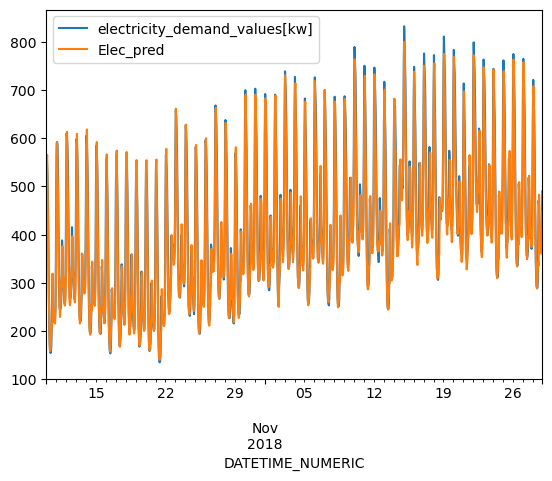

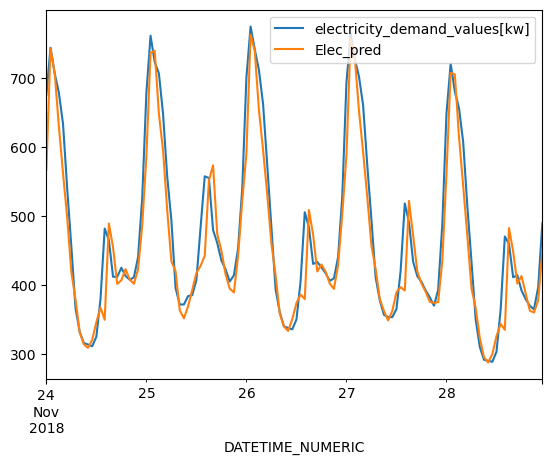

In [36]:
df[["electricity_demand_values[kw]", "Elec_pred"]][-1200:].plot() # plot last 1200 Units -> 50 days (24 hours * 5 days * 10)
df[["electricity_demand_values[kw]", "Elec_pred"]][-120:].plot() # plot last 120 Units -> 5 days (24 hours * 5 days )

In [37]:
model.save("./model/lstm_1")

INFO:tensorflow:Assets written to: ./model/lstm_1/assets


INFO:tensorflow:Assets written to: ./model/lstm_1/assets
